<a href="https://colab.research.google.com/github/juanfisicobr/seminario_PPGEC/blob/main/AFE_pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SCRIPT DIDÁTICO PARA ANÁLISE FATORIAL EXPLORATÓRIA (AFE)                    
Autor da revisão: Dr. Juan Carlos Teran Briceno

Público-alvo: Estudantes do PPGEC

# PREPARAÇÃO DO AMBIENTE

O primeiro passo em qualquer análise em R é garantir que temos todas as ferramentas (pacotes) necessárias para o trabalho.

**Lista dos pacotes que serão utilizados na análise.**


*   "readrxl" é a ferramenta específica para trabalhar com o formato proprietário do Excel (.xlsx, .xls). Para o uso de otros  arquivos de texto simples e universais (.csv) usar readr.
*   "corrplot" Pacote para criar visualizações gráficas de matrizes de correlação.
*   "psych" Pacote fundamental para psicometria e análises fatoriais.

 Este siguente bloco de código verifica se os pacotes já estão instalados. Se não estiverem, ele os instala automaticamente.




In [2]:
lista.de.pacotes <- c("readxl", "corrplot", "psych")
novos.pacotes <- lista.de.pacotes[!(lista.de.pacotes %in% installed.packages()[,"Package"])]
if(length(novos.pacotes)) install.packages(novos.pacotes)


Após garantir a instalação, este comando carrega os pacotes na memória do R para que possamos usar suas funções.


In [3]:
lapply(lista.de.pacotes, require, character.only = TRUE)

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

# CARREGAMENTO E INSPEÇÃO DOS DADOS

**Agora, vamos carregar os dados que serão analisados.**

Neste caso, os dados são numéricos de uma escala Likert e estar em um formato de planilha.

**Leitura do arquivo de dados:**

 Como o arquivo fornecido é .xlsx, usaremos a função read_excel que é robusta e cria um "tibble", uma versão moderna de data.frame.

In [6]:
destfile <- "curso online.xlsx"
curso_online <- read_excel(destfile)
print(curso_online)

# A tibble: 30 × 6
      v1    v2    v3    v4    v5    v6
   <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1     7     3     4     6     2     4
 2     1     3     4     2     5     4
 3     6     2     4     7     1     3
 4     4     5     6     4     2     5
 5     1     2     3     2     6     2
 6     6     3     4     6     2     4
 7     5     3     3     6     4     3
 8     6     4     4     7     1     4
 9     3     4     3     2     6     3
10     2     6     6     2     7     6
# ℹ 20 more rows


A função 'summary' nos dá um resumo estatístico inicial de cada variável:
 mínimo, máximo, média, mediana e quartis. É o primeiro "olhar" para os dados.


In [10]:
summary(curso_online)

       v1              v2            v3            v4            v5     
 Min.   :1.000   Min.   :2.0   Min.   :2.0   Min.   :1.0   Min.   :1.0  
 1st Qu.:2.000   1st Qu.:3.0   1st Qu.:3.0   1st Qu.:2.0   1st Qu.:2.0  
 Median :4.000   Median :4.0   Median :4.0   Median :4.0   Median :3.5  
 Mean   :3.933   Mean   :3.9   Mean   :4.1   Mean   :4.1   Mean   :3.5  
 3rd Qu.:6.000   3rd Qu.:5.0   3rd Qu.:5.0   3rd Qu.:6.0   3rd Qu.:5.0  
 Max.   :7.000   Max.   :7.0   Max.   :7.0   Max.   :7.0   Max.   :7.0  
       v6       
 Min.   :2.000  
 1st Qu.:3.000  
 Median :4.000  
 Mean   :4.167  
 3rd Qu.:4.750  
 Max.   :7.000  

# CONDIÇÕES PARA A ANÁLISE FATORIAL

Antes de rodar a AFE, precisamos verificar se nossos dados são "fatorizáveis".

Ou seja, se faz sentido tentar agrupar as variáveis.

**Matriz de Correlação**

 A AFE se baseia na correlação entre as variáveis. Se as variáveis não se
 correlacionam, não há como agrupá-las em fatores.

 A função 'cor' calcula a matriz de correlação de Pearson entre todas as variáveis.


In [11]:
matriz <- cor(curso_online)
print(matriz, digits = 2)


        v1     v2      v3     v4      v5      v6
v1  1.0000 -0.053 -0.0862  0.873 -0.8576  0.0042
v2 -0.0532  1.000  0.5722 -0.155  0.0197  0.6405
v3 -0.0862  0.572  1.0000 -0.248 -0.0066  0.6405
v4  0.8731 -0.155 -0.2478  1.000 -0.7778 -0.0181
v5 -0.8576  0.020 -0.0066 -0.778  1.0000 -0.1364
v6  0.0042  0.640  0.6405 -0.018 -0.1364  1.0000


A função 'corrplot' cria um gráfico da matriz, facilitando a visualização dos padrões.

Círculos maiores e mais escuros indicam correlações mais fortes.

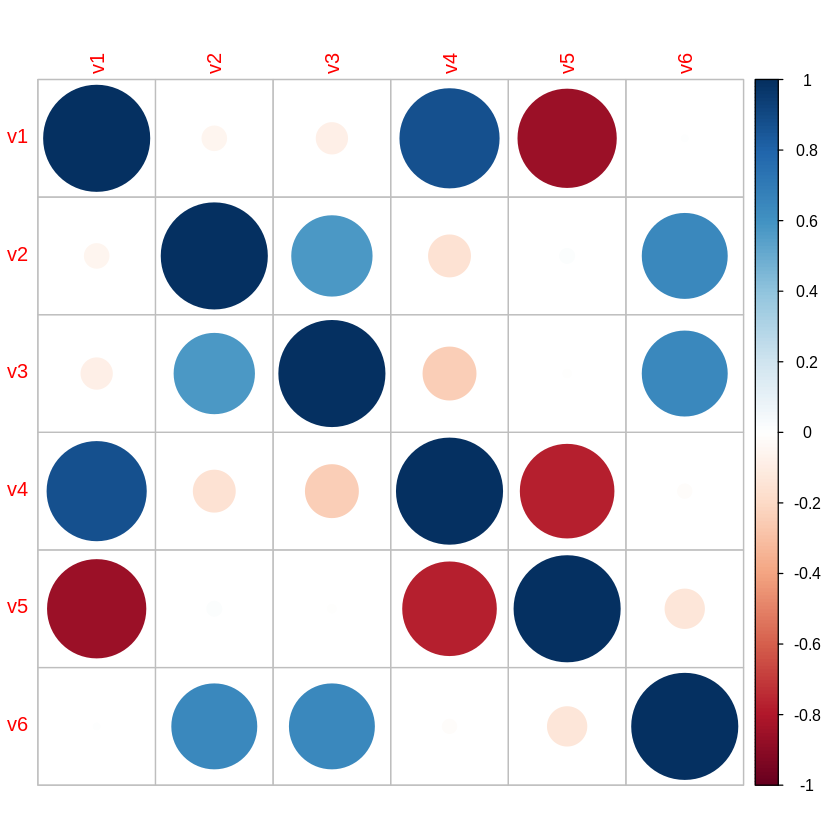

In [12]:
corrplot(matriz, method="circle")

# Teste de esfericidade de Bartlett

 O que faz: Testa a hipótese de que a matriz de correlação é uma matriz identidade (ou seja, todas as correlações são zero).

 Por que é importante: Queremos rejeitar essa hipótese. Um resultado significativo (p < 0.05) indica que existem correlações significativas entre as variáveis, o que é uma condição necessária para a AFE.



In [13]:
test1 <- cortest.bartlett(curso_online)
print(test1)

R was not square, finding R from data



$chisq
[1] 111.3138

$p.value
[1] 9.017094e-17

$df
[1] 15



# Teste de Kaiser-Meyer-Olkin (KMO)

 O que faz: Mede a adequação da amostra para cada variável e para o conjunto total.

 Varia de 0 a 1.

 Por que é importante: O KMO compara a magnitude das correlações observadas com
 a magnitude das correlações parciais. Valores altos (acima de 0.60) indicam
 que a variância das variáveis pode ser explicada por fatores comuns.

*  Abaixo de 0.50: Inaceitável
*  0.50 a 0.59: Ruim
*  0.60 a 0.69: Medíocre
*  0.70 a 0.79: Razoável
*  0.80 a 0.89: Bom
*  0.90 ou mais: Excelente


In [15]:
KMO(curso_online)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = curso_online)
Overall MSA =  0.66
MSA for each item = 
  v1   v2   v3   v4   v5   v6 
0.62 0.70 0.64 0.68 0.77 0.56 

# DETERMINAÇÃO DO NÚMERO DE FATORES A SEREM EXTRAÍDOS

 Esta é uma das decisões mais importantes na AFE. Quantos fatores (dimensões latentes) representam nossos dados? Usamos múltiplos critérios.

**Critério de Kaiser** (Autovalores > 1)

O que é um autovalor (Eigenvalue)? É a quantidade de variância total dos dados
 que é explicada por um determinado fator. Um fator com autovalor igual a 1
 explica a mesma quantidade de variância que uma única variável original.

O Critério de Kaiser sugere reter apenas os fatores com autovalor maior que 1.

 A função 'eigen' calcula os autovalores da matriz de correlação.

In [19]:
autovalores <- eigen(matriz)$values
print(autovalores)




[1] 2.73118833 2.21811927 0.44159791 0.34125765 0.18262823 0.08520861


# Gráfico de Scree (Scree Plot)
 O que faz: Plota os autovalores em ordem decrescente.

 Por que é importante: Procuramos por um "cotovelo" (elbow) no gráfico, que é o
 ponto onde a inclinação da curva muda drasticamente. O número de fatores a
 reter seria o número de pontos ANTES do início do "cotovelo".


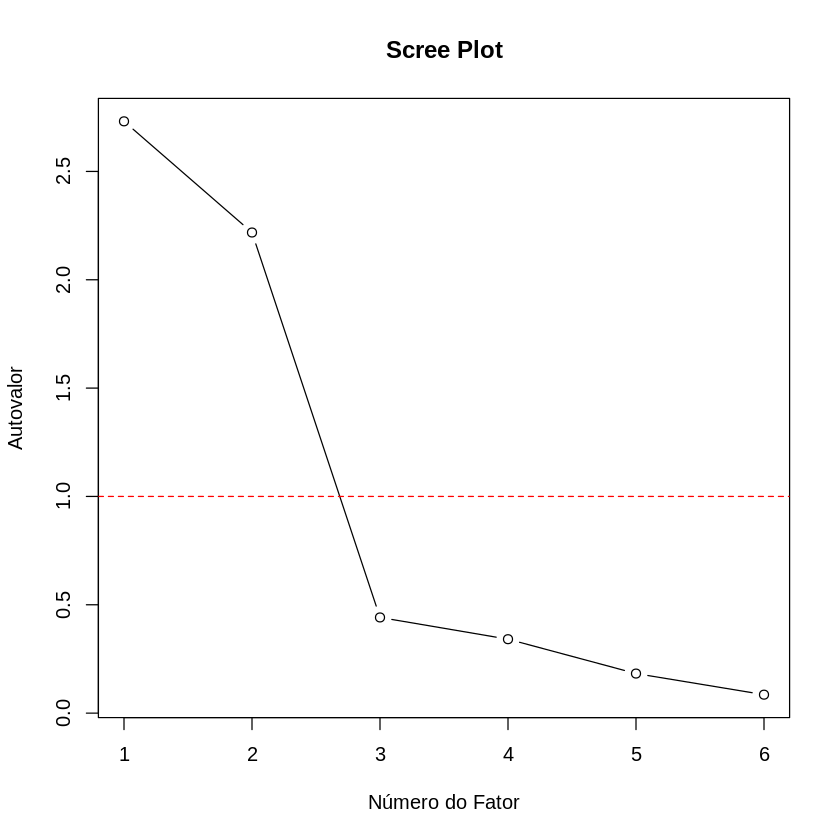

In [20]:
plot(autovalores, type = "b", main = "Scree Plot",
     xlab = "Número do Fator", ylab = "Autovalor")
abline(h = 1, col = "red", lty = 2) # Adiciona a linha de corte de Kaiser (autovalor = 1)

# EXTRAÇÃO E ROTAÇÃO DOS FATORES

 Com base nos critérios acima, definimos o número de fatores a serem extraídos.

 A função 'fa' (Factor Analysis) do pacote 'psych' é uma das mais completas.
 Argumentos:
   - r: O conjunto de dados ou a matriz de correlação.
   - nfactors: O número de fatores que decidimos extrair.
   - rotate: O método de rotação. "oblimin" é uma rotação oblíqua, que permite que os fatores sejam correlacionados (comum em ciências sociais e educação).  Outra opção comum é "varimax" (rotação ortogonal, que assume fatores não-correlacionados).
  - fm: O método de extração dos fatores (factor method). "minres" (Minimum Residual)


# Analises das componentes principais ACP (Não rotada)

 Argumentos:
   - cut = 0.3: Oculta cargas fatoriais com valor absoluto menor que 0.3, limpando a visualização. Uma variável "pertence" a um fator se tiver uma carga alta nele.
   - sort = TRUE: Reorganiza as variáveis para que aquelas que carregam no mesmo fator fiquem juntas.

Factor Analysis using method =  minres
Call: fa(r = curso_online, nfactors = 2, rotate = "none", fm = "minres")
Standardized loadings (pattern matrix) based upon correlation matrix
   item   MR1   MR2   h2    u2 com
v1    1  0.95       0.93 0.071 1.1
v4    4  0.91       0.84 0.164 1.0
v5    5 -0.85       0.79 0.211 1.2
v6    6        0.85 0.72 0.275 1.0
v3    3        0.73 0.60 0.401 1.2
v2    2        0.72 0.56 0.439 1.2

                       MR1  MR2
SS loadings           2.57 1.87
Proportion Var        0.43 0.31
Cumulative Var        0.43 0.74
Proportion Explained  0.58 0.42
Cumulative Proportion 0.58 1.00

Mean item complexity =  1.1
Test of the hypothesis that 2 factors are sufficient.

df null model =  15  with the objective function =  4.25 with Chi Square =  111.31
df of  the model are 4  and the objective function was  0.22 

The root mean square of the residuals (RMSR) is  0.02 
The df corrected root mean square of the residuals is  0.05 

The harmonic n.obs is  30 with the

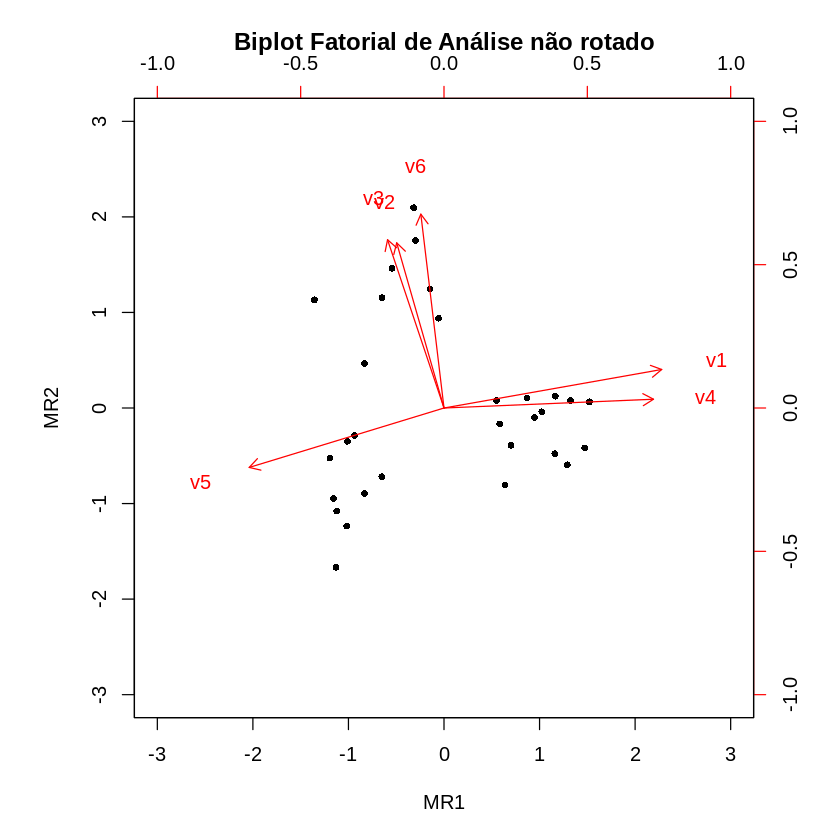

In [26]:
afe_resultado1 <- fa(curso_online, nfactors = 2, rotate = "none", fm = "minres")
print(afe_resultado1, cut = 0.3, sort = TRUE)
biplot(afe_resultado1,  main = paste("Biplot Fatorial de Análise não rotado"))

# Como interpretar a saída:
 - A tabela "Factor Loadings" é o principal. As colunas (MR1, MR2, etc.) são os fatores.
 - Olhe para cada variável (linha) e veja em qual fator ela tem a maior carga.
 - h2 (comunalidade): Proporção da variância de uma variável que é explicada pelos fatores.
   Valores baixos (< 0.30) podem indicar que a variável não se encaixa bem no modelo.
 - u2 (unicidade): É 1 - h2. É a parte da variância que é única daquela variável.
 - Ao final, a "Proportion Var" mostra quanta variância total dos dados é explicada por cada fator.


# Analises das componentes principais ACP (Rotada ortogonal)

Factor Analysis using method =  minres
Call: fa(r = curso_online, nfactors = 2, rotate = "varimax", fm = "minres")
Standardized loadings (pattern matrix) based upon correlation matrix
   item   MR1   MR2   h2    u2 com
v1    1  0.96       0.93 0.071 1.0
v4    4  0.90       0.84 0.164 1.1
v5    5 -0.88       0.79 0.211 1.0
v6    6        0.85 0.72 0.275 1.0
v3    3        0.77 0.60 0.401 1.0
v2    2        0.75 0.56 0.439 1.0

                       MR1  MR2
SS loadings           2.54 1.90
Proportion Var        0.42 0.32
Cumulative Var        0.42 0.74
Proportion Explained  0.57 0.43
Cumulative Proportion 0.57 1.00

Mean item complexity =  1
Test of the hypothesis that 2 factors are sufficient.

df null model =  15  with the objective function =  4.25 with Chi Square =  111.31
df of  the model are 4  and the objective function was  0.22 

The root mean square of the residuals (RMSR) is  0.02 
The df corrected root mean square of the residuals is  0.05 

The harmonic n.obs is  30 with th

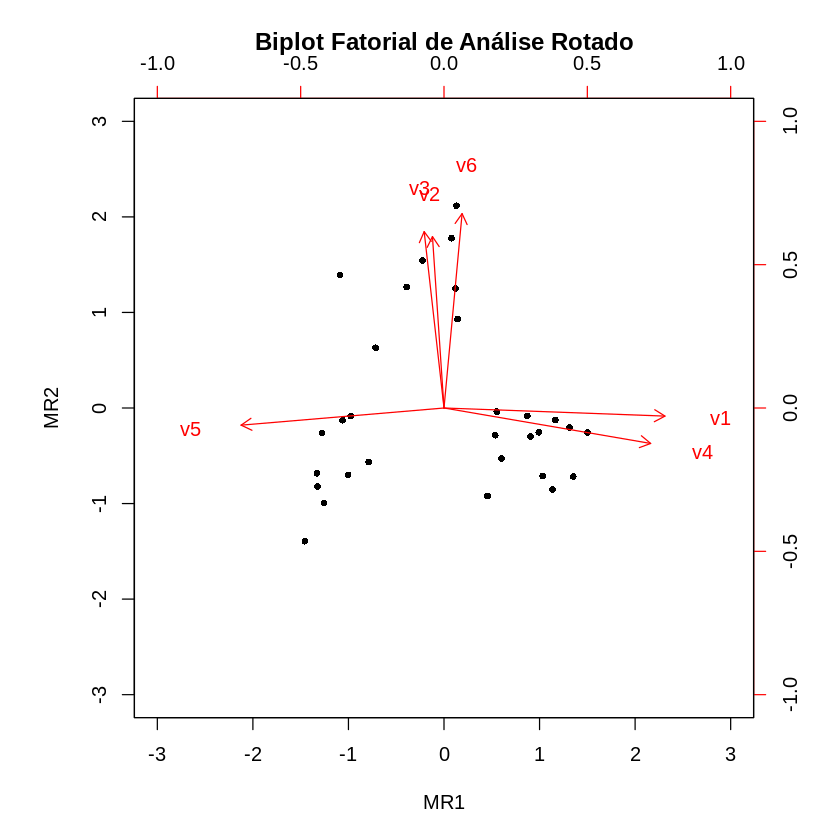

In [27]:
afe_resultado2 <- fa(curso_online, nfactors = 2, rotate = "varimax", fm = "minres")
print(afe_resultado2, cut = 0.3, sort = TRUE)
biplot(afe_resultado2,  main = paste("Biplot Fatorial de Análise Rotado"))

# Analises das componentes principais (rotação oblíqua) RECOMENDADA PARA EDUCAÇÃO EM CIÊNCIA

Factor Analysis using method =  minres
Call: fa(r = curso_online, nfactors = 2, rotate = "oblimin", fm = "minres")
Standardized loadings (pattern matrix) based upon correlation matrix
   item   MR1   MR2   h2    u2 com
v1    1  0.96       0.93 0.071   1
v4    4  0.90       0.84 0.164   1
v5    5 -0.89       0.79 0.211   1
v6    6        0.85 0.72 0.275   1
v3    3        0.77 0.60 0.401   1
v2    2        0.75 0.56 0.439   1

                       MR1  MR2
SS loadings           2.54 1.89
Proportion Var        0.42 0.32
Cumulative Var        0.42 0.74
Proportion Explained  0.57 0.43
Cumulative Proportion 0.57 1.00

 With factor correlations of 
      MR1   MR2
MR1  1.00 -0.05
MR2 -0.05  1.00

Mean item complexity =  1
Test of the hypothesis that 2 factors are sufficient.

df null model =  15  with the objective function =  4.25 with Chi Square =  111.31
df of  the model are 4  and the objective function was  0.22 

The root mean square of the residuals (RMSR) is  0.02 
The df corrected

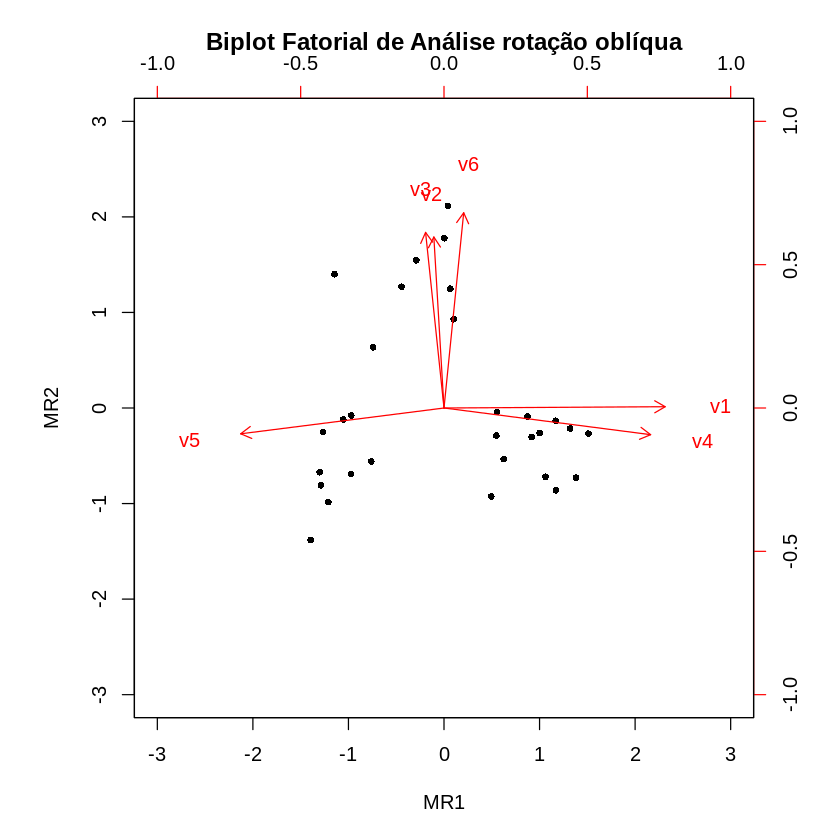

In [30]:
afe_resultado <- fa(curso_online, nfactors = 2, rotate = "oblimin", fm = "minres")
print(afe_resultado, cut = 0.3, sort = TRUE)
biplot(afe_resultado,  main = paste("Biplot Fatorial de Análise rotação oblíqua"))

# VISUALIZAÇÃO E INTERPRETAÇÃO
**Diagrama Fatorial**

 Um diagrama fatorial ajuda a visualizar a estrutura encontrada.

 A função 'fa.diagram' mostra os fatores como elipses e as variáveis como retângulos.

 As setas indicam as cargas fatoriais.



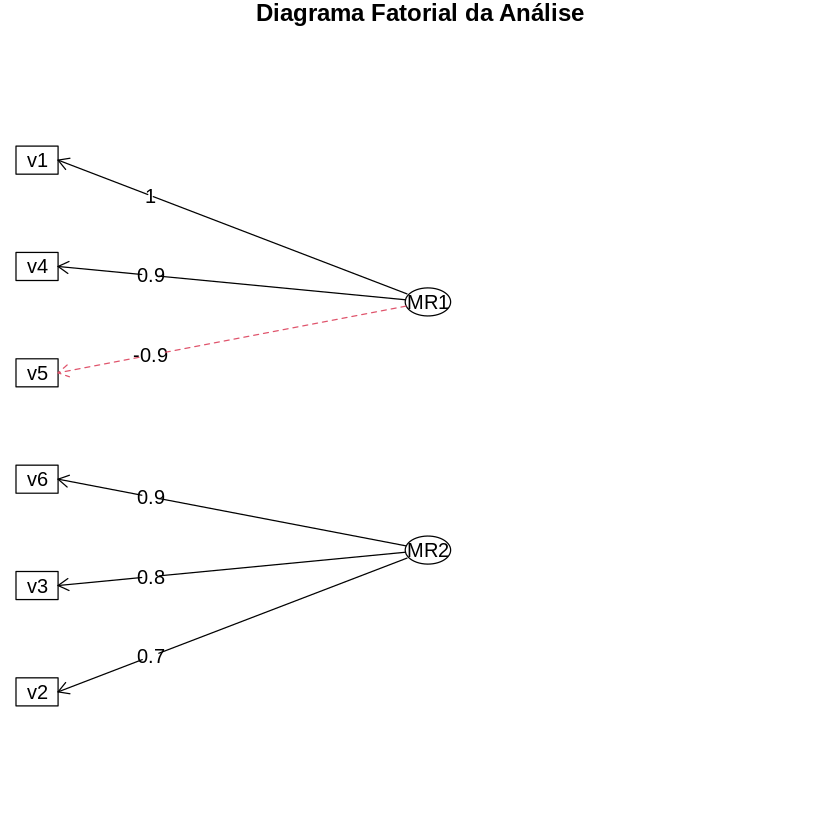

In [31]:
fa.diagram(afe_resultado, main = "Diagrama Fatorial da Análise")

 Após visualizar as cargas e o diagrama, o passo final é a interpretação teórica.

 Olhe para as variáveis que se agruparam em cada fator e tente dar um nome ou um significado conceitual para aquele fator, com base no que as variáveis têm em comum. Este é o momento em que a estatística se conecta novamente com a teoria da sua área de pesquisa.